In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
mart_sales_train=pd.read_csv('/content/train.csv')
mart_sales_test=pd.read_csv('/content/test.csv')
mart_sales_train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
mart_sales_train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
mart_sales_train.shape, mart_sales_test.shape

((8523, 12), (5681, 11))

In [ ]:
# test_df['Item_Outlet_Sales'] = np.nan
mart_sales_train['source'] = 'train'
mart_sales_test['source'] = 'test'
data = pd.concat([mart_sales_train, mart_sales_test], ignore_index=True)
print('After Combining Datasets: ', data.shape)

After Combining Datasets:  (14204, 11)


In [ ]:
mart_sales_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
mart_sales_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
mart_sales_train.isnull().sum()/mart_sales_train.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

**bold text** The output of the code will be a Series or DataFrame (depending on the structure of `mart_sales_train`) that shows the percentage of missing values in each column of the dataset. This information can help you identify columns with a high percentage of missing values that may require further investigation or handling, such as imputation or removal of those columns.

We have 17% and 28% null value in item_weight and outlet_size column in mar_sales_train


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


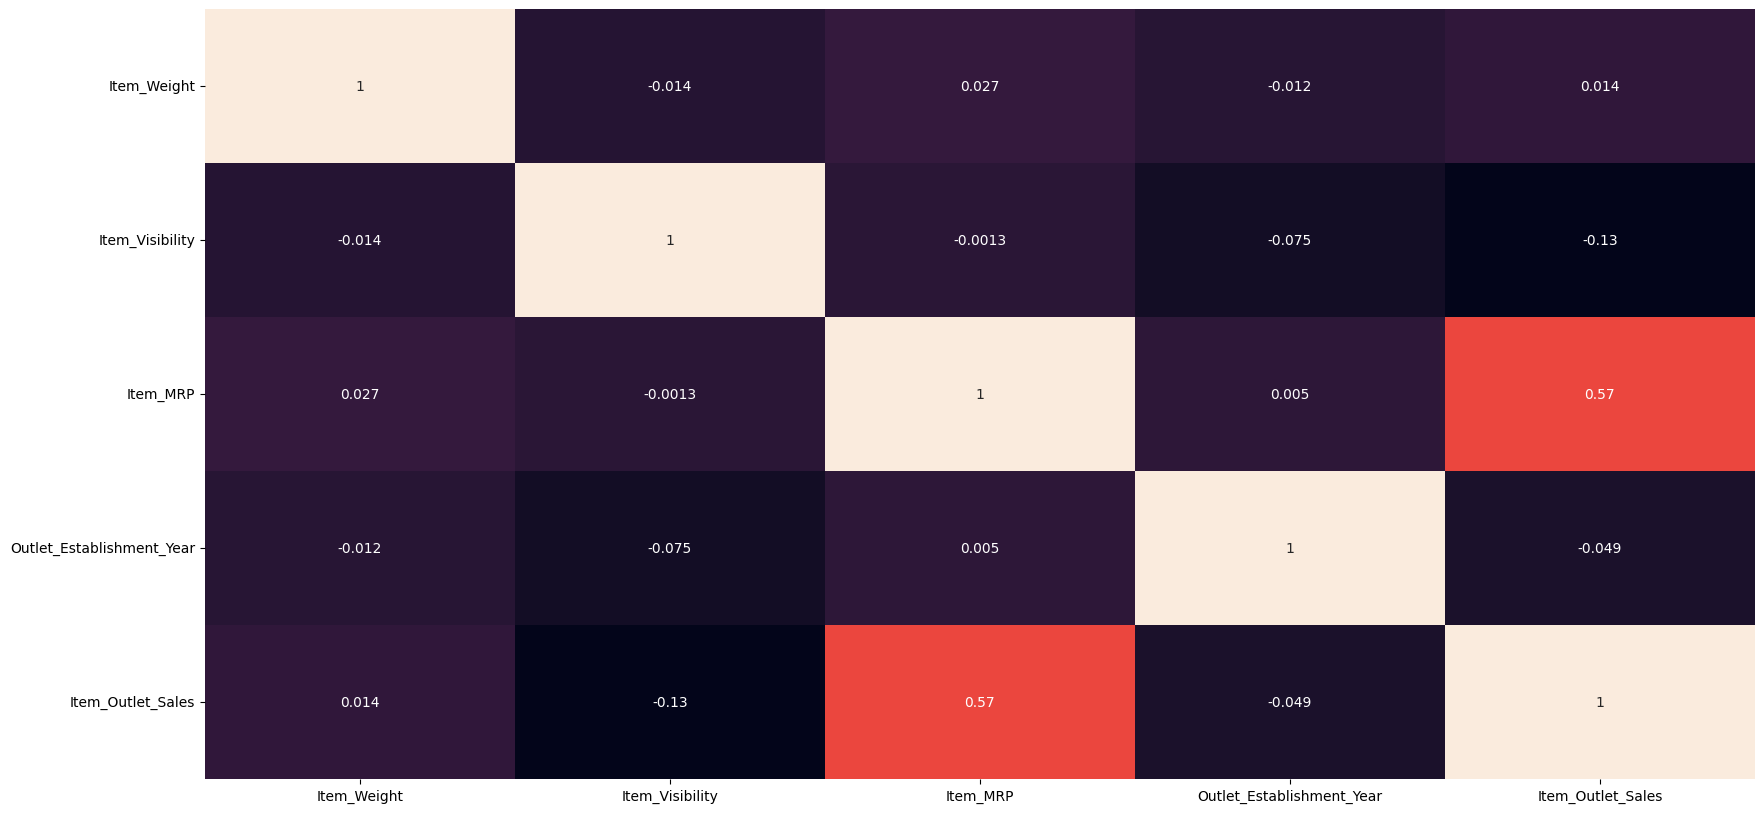

In [ ]:
corr=mart_sales_train.corr()
sns.heatmap(corr,annot=True,cbar=False)
corr

The output of the code will be a heatmap plot that visually represents the correlation between the columns of the `mart_sales_train` dataset. This plot helps identify patterns and relationships between variables.

In [ ]:
object=mart_sales_train.select_dtypes(include='object').columns
object

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

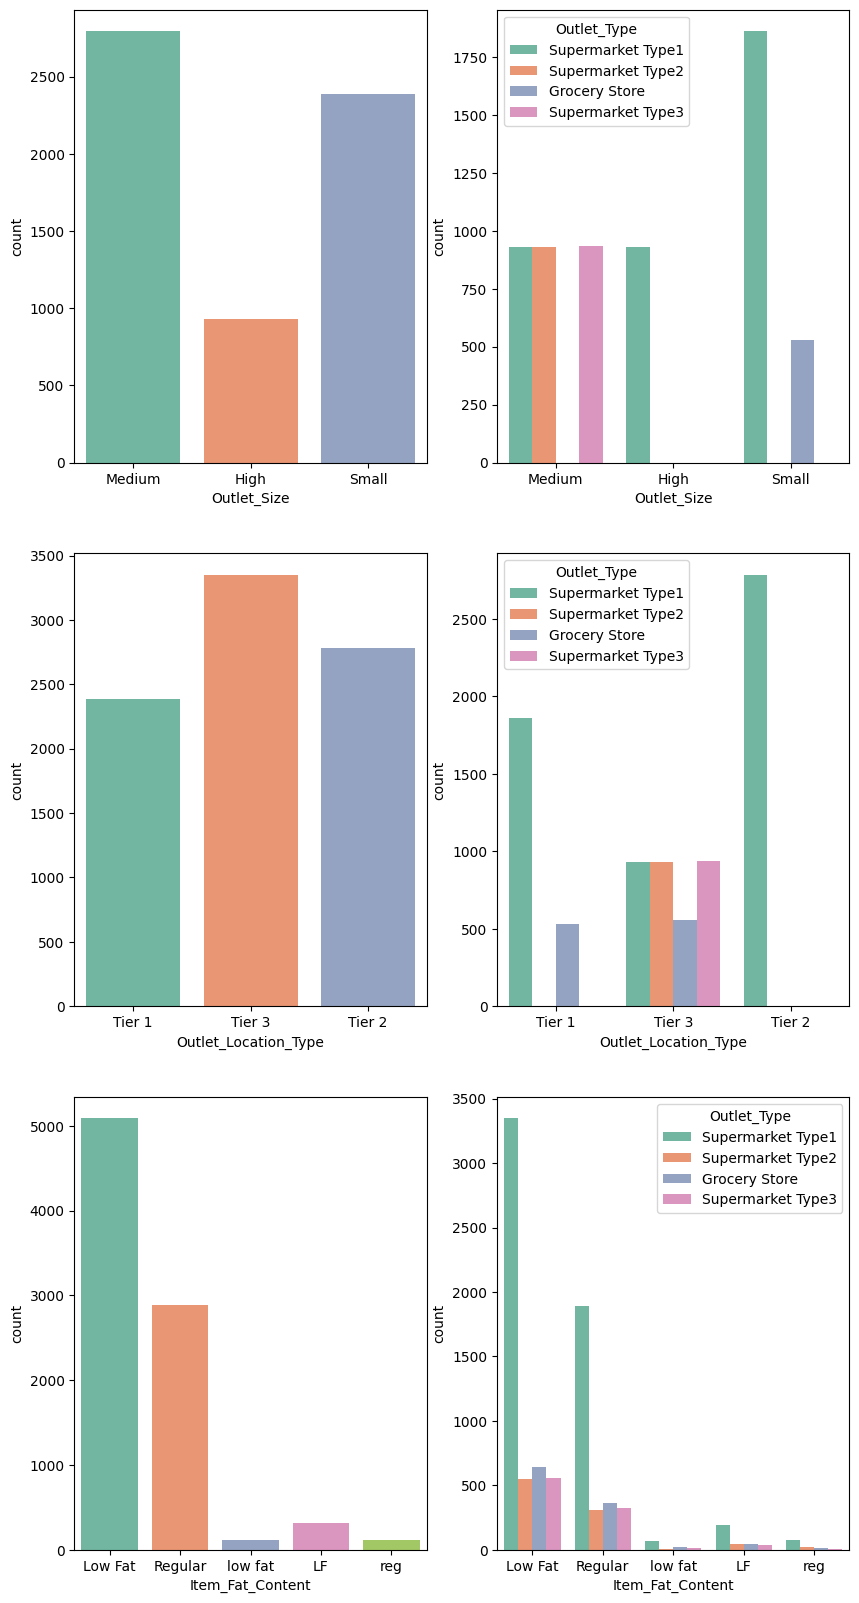

In [ ]:
#data Visualization
plt.figure(figsize=(10,20))
i=1
for col in ['Outlet_Size', 'Outlet_Location_Type','Item_Fat_Content']:
    plt.subplot(3,2,i)
    sns.countplot(x=col,data=mart_sales_train,palette='Set2')
    i+=1
    plt.subplot(3,2,i)
    sns.countplot(x=col,hue='Outlet_Type',data=mart_sales_train,palette='Set2')
    i+=1

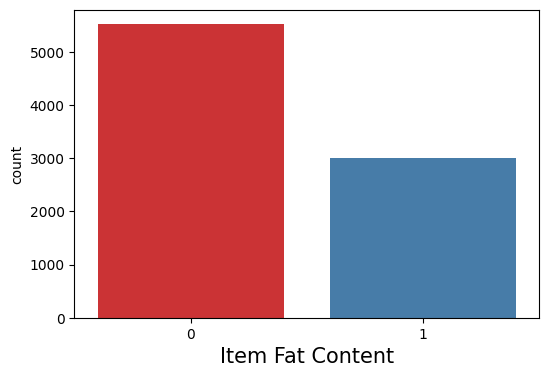

In [ ]:
# Categorial Data
['Item_Identifier', 'Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size',
'Outlet_Location_Type', 'Outlet_Type', 'Item_Type', 'Item_Type_Combined' ]

# CountPlot for Item_Fat_Content
plt.figure(figsize=(6,4))
sns.countplot(data=mart_sales_train, x='Item_Fat_Content',palette='Set1')
plt.xlabel('Item Fat Content', fontsize=15)
plt.show()

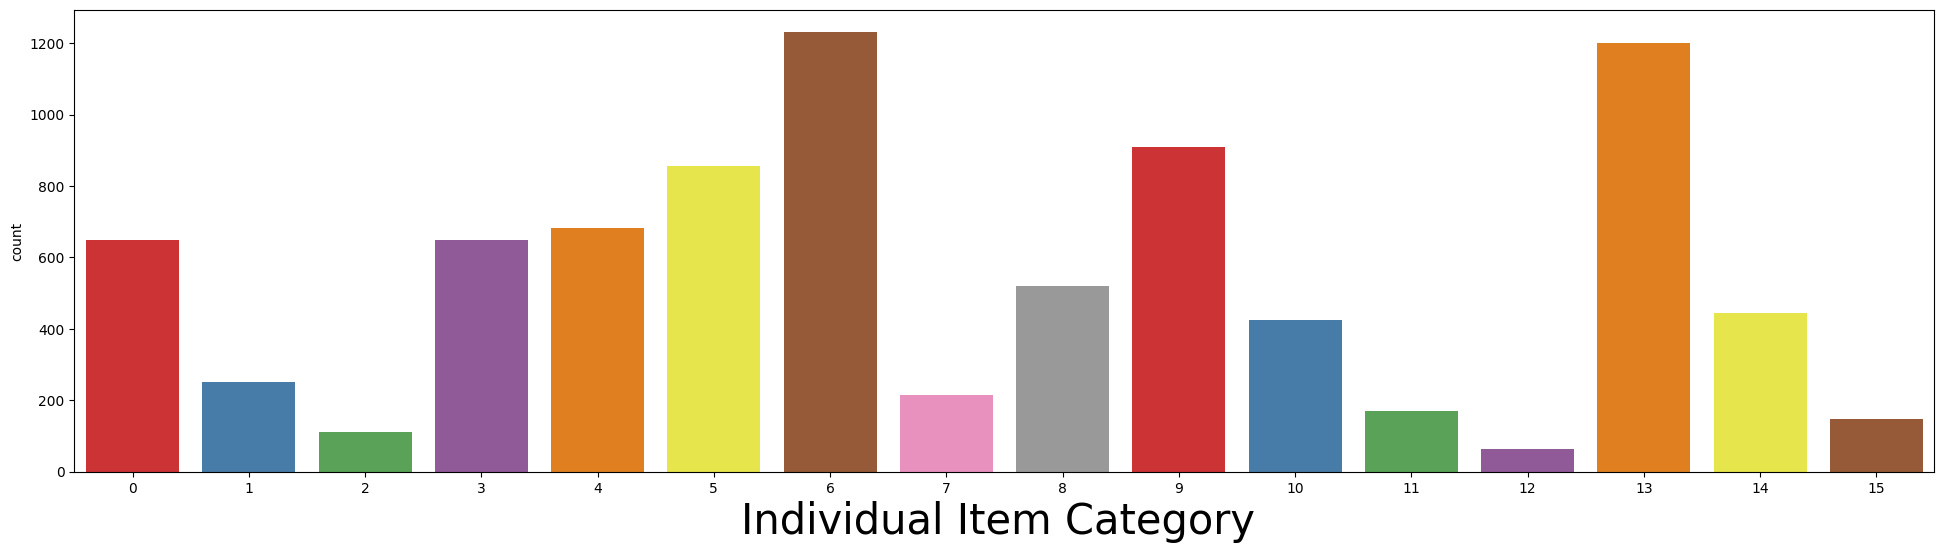

In [ ]:
# CountPlot for Individual Item Category
plt.figure(figsize=(24,6))
sns.countplot(data=mart_sales_train, x='Item_Type',  palette='Set1')
plt.xlabel('Individual Item Category ', fontsize=30)
plt.show()

The first count plot shows the count of each unique value in the column, while the second count plot differentiates the counts based on the 'Outlet_Type' column. This visualization helps understand the distribution and relationships between the selected columns and the 'Outlet_Type' column.

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

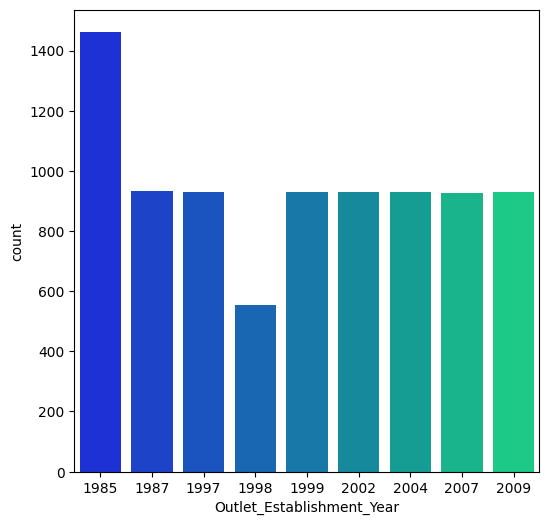

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=mart_sales_train,palette='winter')


The x-axis represents the 'Outlet_Establishment_Year' column, which contains the years in which the outlets were established.
- The y-axis represents the count of occurrences for each unique value (i.e., each year) in the 'Outlet_Establishment_Year' column.
This count plot helps analyze the frequency of outlet establishment years and provides insights into the distribution of sales outlets over time.


<Axes: xlabel='Item_Type', ylabel='count'>

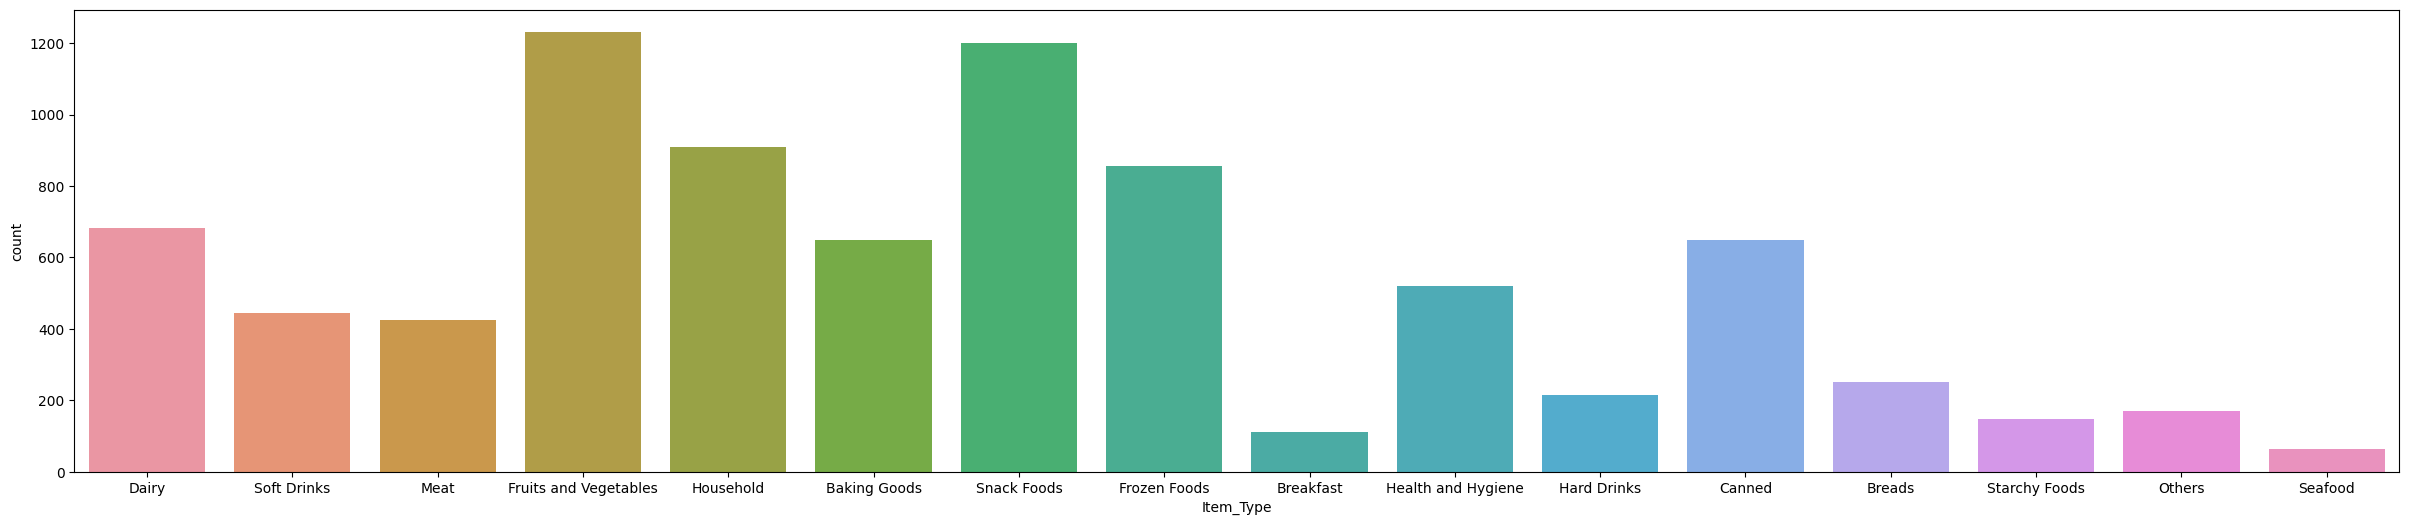

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=mart_sales_train)

The x-axis represents the 'Item_Type' column, which contains the types of items sold in the sales mart.
The y-axis represents the count of occurrences for each unique item type in the 'Item_Type' column.
This count plot helps analyze the frequency of different item types and provides insights into the distribution of sales across various categories of products.

<Axes: xlabel='Item_MRP', ylabel='Density'>

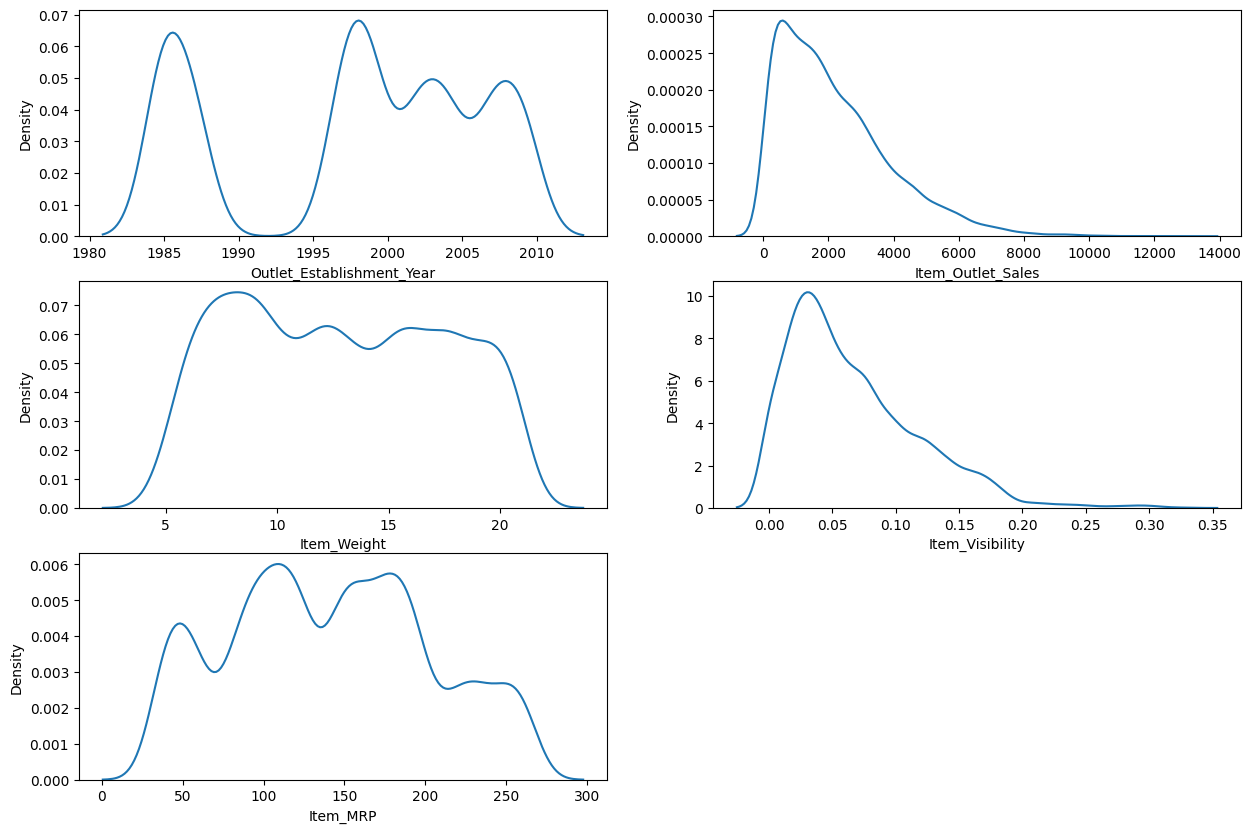

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.kdeplot(x='Outlet_Establishment_Year',data=mart_sales_train,palette='Set2')
plt.subplot(3,2,2)
sns.kdeplot(x='Item_Outlet_Sales',data=mart_sales_train,palette='Set2')
plt.subplot(3,2,3)
sns.kdeplot(x='Item_Weight',data=mart_sales_train,palette='Set2')
plt.subplot(3,2,4)
sns.kdeplot(x='Item_Visibility',data=mart_sales_train,palette='Set2')
plt.subplot(3,2,5)
sns.kdeplot(x='Item_MRP',data=mart_sales_train,palette='Set2')

 These KDE plots provide insights into the distribution and density of the selected numerical columns in the `mart_sales_train` dataset. They help identify patterns, peaks, and outliers, allowing for a better understanding of the data's characteristics.

In [ ]:
mart_sales_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

The output of `mart_sales_test.isnull().sum()` provides information about the presence of missing values in each column of the dataset. It helps identify columns with missing data, allowing for further investigation or appropriate handling of missing values during data preprocessing.

In [ ]:
mart_sales_test.isnull().sum()/mart_sales_train.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  11.451367
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  18.843130
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

 By dividing the count of missing values by the total number of rows and multiplying by 100, we get the percentage of missing values for each column.


We have 11% and 18% null value in item_weight and outlet_size column in mar_sales_test


In [ ]:
mart_sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


The output of `mart_sales_train.info()` provides a summary of the datase

The percentage of null in Item_weight column is less just 17% and 11% in train and test so we can impute the null value with mean


In [ ]:
data_=pd.DataFrame(mart_sales_train.isnull().sum(),columns=['Number Of Null'])
data_['Precision']=data_['Number Of Null']/len(mart_sales_train)*100
data_

,Number Of Null,Precision
Item_Identifier,0,0.000000
Item_Weight,1463,17.165317
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Size,2410,28.276428
Outlet_Location_Type,0,0.000000


In [ ]:
mart_sales_train['Item_Weight'] =  mart_sales_train['Item_Weight'].fillna(mart_sales_train['Item_Weight'].mean())
mart_sales_test['Item_Weight'] =  mart_sales_test['Item_Weight'].fillna(mart_sales_test['Item_Weight'].mean())

The percentage of null in Outlet_Size column is less just 28% and 18% in train and test and Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column



In [ ]:
mart_sales_train['Outlet_Size'] =  mart_sales_train['Outlet_Size'].fillna(mart_sales_train['Outlet_Size'].mode()[0])
mart_sales_test['Outlet_Size'] =  mart_sales_test['Outlet_Size'].fillna(mart_sales_test['Outlet_Size'].mode()[0])

In [ ]:
mart_sales_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
mart_sales_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

We have successfully removed null values from train and test


<Axes: xlabel='Item_Weight'>

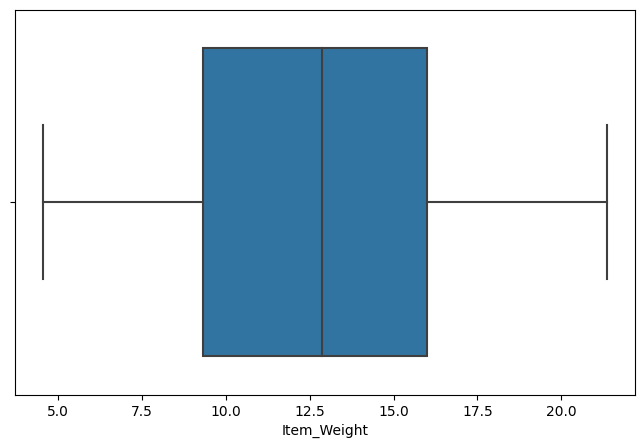

In [ ]:
#Checking outliers

import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(x=mart_sales_train['Item_Weight'])

The resulting output is a boxplot visualization of the 'Item_Weight' column from the 'mart_sales_train' dataset.The box in the plot represents the interquartile range (IQR), which is the range between the 25th and 75th percentiles of the data. The line inside the box represents the median.

In [ ]:
#Removing irregularities from Item_Fat_Content column
mart_sales_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
mart_sales_train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
mart_sales_test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [ ]:
mart_sales_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857645,4.226124,4.555,9.310000,12.857645,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [ ]:
#Removing Unwanted columns
mart_sales_train = mart_sales_train.drop(['Item_Identifier','Outlet_Identifier'], axis = 1)
mart_sales_test = mart_sales_test.drop(['Item_Identifier','Outlet_Identifier'], axis = 1)


In [ ]:
#Encode Categorical Data in both test and train
# Encoding train

from sklearn.preprocessing import LabelEncoder
for col in mart_sales_train.columns:
    if mart_sales_train[col].dtype == 'object':
        lbl=LabelEncoder()
        lbl.fit(list(mart_sales_train[col].values))
        mart_sales_train[col]=lbl.transform(mart_sales_train[col].values)

# Encoding test

for coll in mart_sales_test.columns:
    if mart_sales_test[coll].dtype == 'object':
        lbl=LabelEncoder()
        lbl.fit(list(mart_sales_test[coll].values))
        mart_sales_test[coll]=lbl.transform(mart_sales_test[coll].values)


The output of this code is that the categorical variables in both the 'mart_sales_train' and 'mart_sales_test' datasets are encoded using the LabelEncoder. The categorical values are replaced with their corresponding numerical representations.

In [ ]:
mart_sales_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [ ]:
#Spliting data by train_test_split
x=mart_sales_train.drop('Item_Outlet_Sales',axis=1)
y=mart_sales_train['Item_Outlet_Sales']

The resulting output is that the data has been split into input features (x) and the target variable (y). The input features (x) will contain all the columns except for the 'Item_Outlet_Sales' column, while the target variable (y) will contain only the values from the 'Item_Outlet_Sales' column.

In [ ]:
#Scaling Data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

The resulting output is that the input features (x_train and x_test) are scaled using the StandardScaler.It helps to normalize the features and bring them to a similar scale, preventing certain features from dominating others based on their magnitude.

In [ ]:
#Model Training and Testing
from sklearn.linear_model import LinearRegression #Linear regression is a simple linear model that fits a line to the data.
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor#These are ensemble methods that combine multiple weak models (e.g., decision trees) to create a stronger regression model.
from sklearn.tree import DecisionTreeRegressor#Decision trees are non-linear models that partition the feature space into regions to make predictions.
from sklearn.neighbors import KNeighborsRegressor# K-nearest neighbors is a non-parametric regression algorithm that predicts the target value based on the average of the k nearest neighbors in the feature space
from xgboost import XGBRFRegressor#XGBoost is an optimized implementation of gradient boosting, which is a powerful ensemble method for regression tasks.


In [ ]:
lr=LinearRegression()

knn = KNeighborsRegressor(n_neighbors=10)

dt = DecisionTreeRegressor(max_depth = 3)

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

The output of this code is that instances of the LinearRegression, KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor, AdaBoostRegressor, and GradientBoostingRegressor models are created with specific hyperparameters. These instances can be used to train and test regression models on the data.

In [ ]:
#Testing with linear regression

lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred)
r1

0.5105951012871442

The output of this code is that the linear regression model is trained on the training data, and then used to predict the target variable on the testing data.

In [ ]:
#Testing with KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error
r2 = r2_score(y_test,y_pred)
r2

0.5612992412263934

The output of this code is that the K-nearest neighbors regression model is trained on the training data, and then used to predict the target variable on the testing data. The R-squared score (`r2`) is calculated to evaluate the performance of the model.

In [ ]:
#Testing with DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
from sklearn.metrics import r2_score
r3 = r2_score(y_test,y_pred)
r3

0.5373350141246751

The R-squared score ranges from 0 to 1, where a score of 1 indicates a perfect fit, and a score of 0 indicates no linear relationship between the input features and the target variable.
The Decision Tree regression model is trained on the training data, and then used to predict the target variable on the testing data. The R-squared score (`r3`) is calculated to evaluate the performance of the model.

In [ ]:
#Testing with RandomForestRegressor

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
from sklearn.metrics import r2_score
r4 = r2_score(y_test,y_pred)
r4

0.5505118953347935

The code provided is used to test a Random Forest regression model on the testing data and calculate the R-squared score, which is a measure of how well the model fits the data.

In [ ]:
#Testing with AdaBoostRegressor

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
ada.fit(x_train,y_train)

y_pred = ada.predict(x_test)
from sklearn.metrics import r2_score
r5 = r2_score(y_test,y_pred)
r5

0.5344972153083329

The AdaBoostRegressor algorithm to build a regression model, trains it on the training data, makes predictions on the test data, and evaluates the model's performance using the R-squared (R2) score, which quantifies how well the model explains the variance in the target variable.

In [ ]:
#Testing with GradientBoostingRegressor

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
gbr.fit(x_train,y_train)

y_pred = gbr.predict(x_test)
from sklearn.metrics import r2_score
r6 = r2_score(y_test,y_pred)
r6

0.5914711773741286

The GradientBoostingRegressor algorithm to build a regression model, trains it on the training data, makes predictions on the test data, and evaluates the model's performance.The resulting R2 score is stored in the variable r6.

In [ ]:
#Model Results

metric_results= {'Model': ['linear Regression', 'KNeighbors', 'Decision Tree','RandomForest','AdaBoost','GradientBoosting'],
                 'R Square': [r1, r2, r3,r4,r5,r6]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R Square
0,linear Regression,0.510595
1,KNeighbors,0.561299
2,Decision Tree,0.537335
3,RandomForest,0.550512
4,AdaBoost,0.534497
5,GradientBoosting,0.591471


These R2 values give you insights into how well each model is performing in explaining the variance in the target variable. A higher R2 value indicates that the model is better at capturing and explaining the variability in your data. In this case, the GradientBoosting model has the highest R2 value, suggesting that it provides the best fit among the models  evaluated.

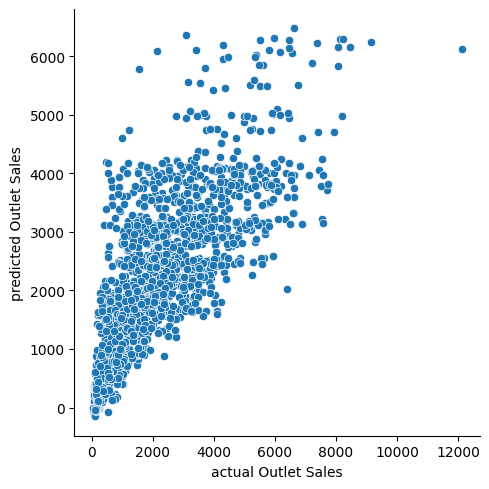

In [ ]:
#plotting model
prediction= pd.DataFrame({'actual Outlet Sales': y_test, 'predicted Outlet Sales': y_pred})#This column holds the actual (ground truth) values of Outlet Sales from your test dataset. These are the real values you want to predict using your regression model.
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales')#This column contains the predicted values of Outlet Sales generated by your GradientBoosting regression model (y_pred) for the same set of data points used in the test dataset.

The resulting scatter plot will show individual points where each point represents a data instance. The x-coordinate of each point corresponds to the actual outlet sales, and the y-coordinate corresponds to the predicted outlet sales